# Preprocess Data

* python script to preprocess the data using various techniques
* python script to perform various exploratory data analysis on the data

## Install required libraries

In [1]:
!pip install emoji
!pip install transformers
!pip install spacy
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import required libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from tqdm.notebook import tqdm
import emoji
import transformers
from tokenizers import BertWordPieceTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from google.colab import drive
import spacy
from wordcloud import WordCloud
from langdetect import detect
from sklearn.model_selection import train_test_split

## Install required packages

In [3]:
nltk.download('punkt') 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Clean data

### Read dataset

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
raw_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nlp project/Dataset/biden_tweets_raw.csv')

raw_df

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2020-12-03 23:59:59+00:00,1334648608638054400,@JoeBiden iste bu be sonuna kadar joe biden,EmirhanCil7
1,1,2020-12-03 23:59:58+00:00,1334648604200415232,"Yet you are uncertain why 23,000+ votes (98% f...",MLKing2
2,2,2020-12-03 23:59:57+00:00,1334648599477690380,Right. Sure. You bet. Joe Biden is the Preside...,gfounder1
3,3,2020-12-03 23:59:57+00:00,1334648598475108357,@AlexisJones1969 @theangiestanton I guess you ...,_Quetzy_
4,4,2020-12-03 23:59:56+00:00,1334648597825146882,Great job team. Biden is just reinstalling al...,sphincter987
...,...,...,...,...,...
19997,9996,2020-12-04 22:57:40+00:00,1334995312637775872,Alito Responds To Appeal Asking To Block Biden...,VeraldoF4F
19998,9997,2020-12-04 22:57:40+00:00,1334995312335699969,@realDonaldTrump What a freeeeakeeennn Joke yo...,bfrando
19999,9998,2020-12-04 22:57:39+00:00,1334995311350177795,@realDonaldTrump Thanks Biden! https://t.co/th...,BlueLanternUSA
20000,9999,2020-12-04 22:57:39+00:00,1334995310226116608,Urge President-elect Biden to undo the damage ...,RickeyButtery


In [6]:
# locate column with texts
text_data_raw = raw_df['Text'].values

In [7]:
text_data_raw

array(['@JoeBiden iste bu be sonuna kadar joe biden',
       'Yet you are uncertain why 23,000+ votes (98% for Biden) were logged at that same location shortly after midnight?\n\n@RealJamesWoods @RealRLimbaugh @RealBasedMAGA',
       'Right. Sure. You bet. Joe Biden is the President and you’re just going to have to accept it. Sound familiar?',
       ..., '@realDonaldTrump Thanks Biden! https://t.co/thJzbLgVtL',
       "Urge President-elect Biden to undo the damage inflicted on America's bedrock environmental law - WildEarth Guardians https://t.co/SoxkaNqh2r",
       "@DeptVetAffairs \nMr Biden hasn't started and already the VA is back to a rude let them die organization.  President Trump is still in charge.  You can treat us like shit after Lyin Biden takes over"],
      dtype=object)

### Remove non-English tweets

In [8]:
languages = []
text_data = []
en_count = 0
for text in text_data_raw:
  if text != '':
    try:
      language = detect(text)
      if language == 'en':
        en_count = en_count + 1
        text_data.append(text)
    except:
      continue
    languages.append(language)

In [9]:
np.unique(languages, return_counts = True)

(array(['af', 'ca', 'cs', 'cy', 'da', 'de', 'el', 'en', 'es', 'et', 'fi',
        'fr', 'hr', 'hu', 'id', 'it', 'ja', 'ko', 'lt', 'nl', 'no', 'pl',
        'pt', 'ro', 'ru', 'sl', 'so', 'sq', 'sv', 'sw', 'tl', 'tr', 'vi',
        'zh-cn'], dtype='<U5'),
 array([   37,    39,     2,     8,    66,   210,     1, 18012,   691,
            9,     7,   146,     1,     2,    43,    40,     4,     1,
            2,   243,    40,     9,   125,   116,     2,     7,    10,
            1,    36,     1,     8,    68,    11,     2]))

In [10]:
print("Number of English texts: " + str(en_count))

Number of English texts: 18012


In [11]:
text_data

['Yet you are uncertain why 23,000+ votes (98% for Biden) were logged at that same location shortly after midnight?\n\n@RealJamesWoods @RealRLimbaugh @RealBasedMAGA',
 'Right. Sure. You bet. Joe Biden is the President and you’re just going to have to accept it. Sound familiar?',
 "@AlexisJones1969 @theangiestanton I guess you don't even half a quarter of one if you think Biden isn't your new president.",
 'Great job team.  Biden is just reinstalling all the people the failed in the BO admin. \n\nFilling the swamp back in.',
 '@bookmaker_eu Will I get paid out on my Biden to win the election bet before 2021?\n\nYes +300\nNo -200',
 '@larryelder Little known fact – that Biden’s support for Thatcher in 1982 was not the first time that the US helped kick Argie ass? Lexington Raid 1831 anyone? \nhttps://t.co/gWrMmEJWJq\nOr p.101  👇\nhttps://t.co/v9LH3geguu',
 '@JoeBiden I speak for all Americans when I say Joe Biden is our President, Trump should have never won 2016, and I can’t wait to fli

In [12]:
# store English tweets as new df
clean_df = pd.DataFrame(text_data, columns = ['Text'])

clean_df

,Text
0,"Yet you are uncertain why 23,000+ votes (98% f..."
1,Right. Sure. You bet. Joe Biden is the Preside...
2,@AlexisJones1969 @theangiestanton I guess you ...
3,Great job team. Biden is just reinstalling al...
4,@bookmaker_eu Will I get paid out on my Biden ...
...,...
18007,Alito Responds To Appeal Asking To Block Biden...
18008,@realDonaldTrump What a freeeeakeeennn Joke yo...
18009,@realDonaldTrump Thanks Biden! https://t.co/th...
18010,Urge President-elect Biden to undo the damage ...


### Remove duplicate tweets

In [13]:
clean_df = clean_df.drop_duplicates(keep='first')

clean_df

,Text
0,"Yet you are uncertain why 23,000+ votes (98% f..."
1,Right. Sure. You bet. Joe Biden is the Preside...
2,@AlexisJones1969 @theangiestanton I guess you ...
3,Great job team. Biden is just reinstalling al...
4,@bookmaker_eu Will I get paid out on my Biden ...
...,...
18007,Alito Responds To Appeal Asking To Block Biden...
18008,@realDonaldTrump What a freeeeakeeennn Joke yo...
18009,@realDonaldTrump Thanks Biden! https://t.co/th...
18010,Urge President-elect Biden to undo the damage ...


### Shuffle cleaned data

In [14]:
# shuffle dataframe rows
df = clean_df.sample(frac=1, random_state=42).reset_index(drop=True)

df

,Text
0,@NCatalyst19 @RattlerGator This fake virus is ...
1,@propublica I now think Biden should keep Trum...
2,@Acosta Hopefully it's a foregone conclusion t...
3,@realDonaldTrump @POTUS I don't trust the @FBI...
4,President-elect Joe Biden is predicting a “ble...
...,...
17626,"@MSNBC I mean shit, what if Biden turns out to..."
17627,Pentagon blocks visits to military spy agencie...
17628,CNN Exclusive: Biden says he will ask American...
17629,@Tomboliko @the_resistor @realDonaldTrump Hill...


## Preprocess functions

In [15]:
def emoji_cleaning(text):
    
  # Change emoji to text
  text = emoji.demojize(text).replace(":", " ")
  
  # Delete repeated emoji
  tokenizer = text.split()
  repeated_list = []
  
  for word in tokenizer:
      if word not in repeated_list:
          repeated_list.append(word)
  
  text = ' '.join(text for text in repeated_list)
  text = text.replace("_", " ").replace("-", " ")
  return text

In [16]:
def clean_smileys(text):
    
    text = re.sub(r'(:\)|: \)|\(\:|:-\)|: -\)|: - \)|:D|: D)', ' smile ', text)
    text = re.sub(r'(:\(|: \(|\)\:|:-\(|: -\(|: - \(|:\'\()', ' dislike ', text)
    text = re.sub(r'(<3)', ' heart ', text)
    text = re.sub(r'(:/)', ' dislike ', text)
    text = re.sub(r'(;\)|; \))', ' wink ', text)
    return ' '.join([word for word in text.split()])

In [17]:
def clean_urls(review):
    review = review.split()
    review = ' '.join([word for word in review if not re.match('^http', word)])
    return review

In [18]:
def decontracted(text):
    text = re.sub(r"won\’t", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"can\’t", "can not", text)
    text = re.sub(r"n\’t", " not", text)
    text = re.sub(r"\’re", " are", text)
    text = re.sub(r"it\'s", "it is", text)
    text = re.sub(r"\’d", " would", text)
    text = re.sub(r"\’ll", " will", text)
    text = re.sub(r"\’t", " not", text)
    text = re.sub(r"\’ve", " have", text)
    text = re.sub(r"\’m", " am", text)

    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\’re", " are", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\’d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\’ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\’t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\’ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\’m", " am", text)
    text = re.sub(r"\“", "", text)
    text = re.sub(r"\”", "", text)
    text = re.sub(r"\…", "", text)

    return text

In [19]:
def clean_text(text):
    text = str(text)
    text = re.sub(r'(\w)\1{2,}', r'\1', text)
    text = re.sub(r'[^a-zA-Z ]+', ' ', text)
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'^RT[\s]+', '', text)
    text = re.sub(r'pic.twitter\S+', ' ', text)
    text = re.sub(r'#', '', text)
    text = text.lower()

    return text

In [20]:
stop_words = stopwords.words('english') 
stop_words.remove('not') 
lemmatizer = WordNetLemmatizer()

In [21]:
def data_preprocessing(review):
    
  # data cleaning
    review = re.sub(re.compile('<.*?>'), '', review) #removing html tags
    review =  re.sub('[^A-Za-z0-9]+', ' ', review) #taking only words
  
  # lowercase
    review = review.lower()
  
  # tokenization
    tokens = nltk.word_tokenize(review) # converts review to tokens
  
  # stop_words removal
    review = [word for word in tokens if word not in stop_words] #removing stop words
  
  # lemmatization
    review = [lemmatizer.lemmatize(word) for word in review]
  
  # join words in preprocessed review
    review = ' '.join(review)
    return review

## Process dataset

### Full dataset

#### Read dataset

In [22]:
# rename text coumn
df = df.rename(columns={'Text': 'raw_text'})

df

,raw_text
0,@NCatalyst19 @RattlerGator This fake virus is ...
1,@propublica I now think Biden should keep Trum...
2,@Acosta Hopefully it's a foregone conclusion t...
3,@realDonaldTrump @POTUS I don't trust the @FBI...
4,President-elect Joe Biden is predicting a “ble...
...,...
17626,"@MSNBC I mean shit, what if Biden turns out to..."
17627,Pentagon blocks visits to military spy agencie...
17628,CNN Exclusive: Biden says he will ask American...
17629,@Tomboliko @the_resistor @realDonaldTrump Hill...


#### Preprocess tweets

In [23]:
df['clean_text'] = df['raw_text'].apply(clean_urls).apply(clean_text).apply(emoji_cleaning).apply(clean_smileys).apply(decontracted)
#.apply(correct_spellings)

In [24]:
df['clean_text'] = df['clean_text'].apply(lambda review: data_preprocessing(review))

df

,raw_text,clean_text
0,@NCatalyst19 @RattlerGator This fake virus is ...,ncatalyst rattlergator fake virus deep state g...
1,@propublica I now think Biden should keep Trum...,propublica think biden keep trump anti deep st...
2,@Acosta Hopefully it's a foregone conclusion t...,acosta hopefully foregone conclusion president...
3,@realDonaldTrump @POTUS I don't trust the @FBI...,realdonaldtrump potus trust fbi wray even look...
4,President-elect Joe Biden is predicting a “ble...,president elect joe biden predicting bleak fut...
...,...,...
17626,"@MSNBC I mean shit, what if Biden turns out to...",msnbc mean shit biden turn disaster people flo...
17627,Pentagon blocks visits to military spy agencie...,pentagon block visit military spy agency biden...
17628,CNN Exclusive: Biden says he will ask American...,cnn exclusive biden say ask american wear mask...
17629,@Tomboliko @the_resistor @realDonaldTrump Hill...,tomboliko resistor realdonaldtrump hillary che...


#### Export processed data

In [25]:
process_file_name = 'biden_tweets_processed.csv'
  
df.to_csv(process_file_name)

### Labeled dataset

* subjectivity: 0 - neutral, 1 - opinionated
* polarity: 0 - negative, 1 - positive, 2 - neutral

#### Read dataset

In [26]:
label_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nlp project/Dataset/biden_tweets_labeled.csv')

label_df

,Unnamed: 0,Text,subjectivity,polarity
0,0,@RT_com That’s the guy who is funding those fa...,1,1
1,1,Biden apparently just told JTaps that he's goi...,1,0
2,2,@Kingofgameplay1 @HeathMayo They've been given...,1,0
3,3,@conorjrogers @reedgalen They could not raise ...,1,1
4,4,Can`t Biden just fire the board members on the...,1,0
...,...,...,...,...
1761,878,"@KThomasDC @costareports That’s nice, but I ho...",0,2
1762,879,@livingdead1970 OMG. You are a sensitive soul...,1,1
1763,880,@bryceagen @itsJeffTiedrich @realDonaldTrump @...,1,1
1764,881,@Tomboliko @the_resistor @realDonaldTrump Hill...,1,0


In [27]:
label_df.columns

Index(['Unnamed: 0', 'Text', 'subjectivity', 'polarity'], dtype='object')

In [28]:
# drop irrelevant column(s) 
label_df = label_df.drop('Unnamed: 0', axis=1)

label_df

,Text,subjectivity,polarity
0,@RT_com That’s the guy who is funding those fa...,1,1
1,Biden apparently just told JTaps that he's goi...,1,0
2,@Kingofgameplay1 @HeathMayo They've been given...,1,0
3,@conorjrogers @reedgalen They could not raise ...,1,1
4,Can`t Biden just fire the board members on the...,1,0
...,...,...,...
1761,"@KThomasDC @costareports That’s nice, but I ho...",0,2
1762,@livingdead1970 OMG. You are a sensitive soul...,1,1
1763,@bryceagen @itsJeffTiedrich @realDonaldTrump @...,1,1
1764,@Tomboliko @the_resistor @realDonaldTrump Hill...,1,0


In [29]:
# rename text coumn
label_df = label_df.rename(columns={'Text': 'raw_text'})

label_df

,raw_text,subjectivity,polarity
0,@RT_com That’s the guy who is funding those fa...,1,1
1,Biden apparently just told JTaps that he's goi...,1,0
2,@Kingofgameplay1 @HeathMayo They've been given...,1,0
3,@conorjrogers @reedgalen They could not raise ...,1,1
4,Can`t Biden just fire the board members on the...,1,0
...,...,...,...
1761,"@KThomasDC @costareports That’s nice, but I ho...",0,2
1762,@livingdead1970 OMG. You are a sensitive soul...,1,1
1763,@bryceagen @itsJeffTiedrich @realDonaldTrump @...,1,1
1764,@Tomboliko @the_resistor @realDonaldTrump Hill...,1,0


#### Preprocess tweets

In [30]:
label_df['clean_text'] = label_df['raw_text'].apply(clean_urls).apply(clean_text).apply(emoji_cleaning).apply(clean_smileys).apply(decontracted)
#.apply(correct_spellings)

In [31]:
label_df['clean_text'] = label_df['clean_text'].apply(lambda review: data_preprocessing(review))

label_df

,raw_text,subjectivity,polarity,clean_text
0,@RT_com That’s the guy who is funding those fa...,1,1,rt com guy funding fake story hunter biden
1,Biden apparently just told JTaps that he's goi...,1,0,biden apparently told jtaps going ask everyone...
2,@Kingofgameplay1 @HeathMayo They've been given...,1,0,kingofgameplay heathmayo given chance blown tr...
3,@conorjrogers @reedgalen They could not raise ...,1,1,conorjrogers reedgalen could not raise money b...
4,Can`t Biden just fire the board members on the...,1,0,biden fire board member postal governor replace
...,...,...,...,...
1761,"@KThomasDC @costareports That’s nice, but I ho...",0,2,kthomasdc costareports nice hope biden think m...
1762,@livingdead1970 OMG. You are a sensitive soul...,1,1,livingdead omg sensitive soul record massive o...
1763,@bryceagen @itsJeffTiedrich @realDonaldTrump @...,1,1,bryceagen itsjefftiedrich realdonaldtrump coac...
1764,@Tomboliko @the_resistor @realDonaldTrump Hill...,1,0,tomboliko resistor realdonaldtrump hillary che...


#### Export processed data

In [32]:
label_df.columns

Index(['raw_text', 'subjectivity', 'polarity', 'clean_text'], dtype='object')

In [33]:
new_cols = ["raw_text","clean_text","subjectivity","polarity"]
label_df = label_df[new_cols]

label_df

,raw_text,clean_text,subjectivity,polarity
0,@RT_com That’s the guy who is funding those fa...,rt com guy funding fake story hunter biden,1,1
1,Biden apparently just told JTaps that he's goi...,biden apparently told jtaps going ask everyone...,1,0
2,@Kingofgameplay1 @HeathMayo They've been given...,kingofgameplay heathmayo given chance blown tr...,1,0
3,@conorjrogers @reedgalen They could not raise ...,conorjrogers reedgalen could not raise money b...,1,1
4,Can`t Biden just fire the board members on the...,biden fire board member postal governor replace,1,0
...,...,...,...,...
1761,"@KThomasDC @costareports That’s nice, but I ho...",kthomasdc costareports nice hope biden think m...,0,2
1762,@livingdead1970 OMG. You are a sensitive soul...,livingdead omg sensitive soul record massive o...,1,1
1763,@bryceagen @itsJeffTiedrich @realDonaldTrump @...,bryceagen itsjefftiedrich realdonaldtrump coac...,1,1
1764,@Tomboliko @the_resistor @realDonaldTrump Hill...,tomboliko resistor realdonaldtrump hillary che...,1,0


In [34]:
process_label_file_name = 'biden_tweets_labeled_processed.csv'
  
label_df.to_csv(process_label_file_name)

## Explore dataset

### Full dataset

#### Word counts

In [35]:
raw_word_counts = df['raw_text'].apply(lambda x: len(x.split()))

raw_word_counts.describe()

count    17631.000000
mean        25.525665
std         14.456534
min          2.000000
25%         14.000000
50%         22.000000
75%         37.000000
max        101.000000
Name: raw_text, dtype: float64

In [36]:
clean_word_counts = df['clean_text'].apply(lambda x: len(x.split()))

clean_word_counts.describe()

count    17631.000000
mean        14.210708
std          7.498815
min          1.000000
25%          8.000000
50%         13.000000
75%         20.000000
max         83.000000
Name: clean_text, dtype: float64

#### Tokenization

In [37]:
nlp = spacy.load('en_core_web_sm')
nlp

In [38]:
clean_text_data = df['clean_text'].values

clean_text_data

array(['ncatalyst rattlergator fake virus deep state gift keep giving see hedging kingmaker biden admin appointing special counsel hinders trump ability declas make',
       'propublica think biden keep trump anti deep state schedule f executive order place long enough find appointee burrowed civil service reclassify fire',
       'acosta hopefully foregone conclusion presidential medal freedom given dr fauci president biden definitely earned one amp put simply allowed job',
       ...,
       'cnn exclusive biden say ask american wear mask first day office ye massupwithtekwithoutany nsnolage amp thenblameitonb gt idon tthinkso nobllts hacktekgroupfrauds circusworld',
       'tomboliko resistor realdonaldtrump hillary cheat enough last time biden cheated much afford loose stopping count simultaneously several state obvious half country understands election stolen',
       'biden say trump attend inauguration sake america image'],
      dtype=object)

In [39]:
texts = ''
for text in clean_text_data:
  texts += ' ' + text

In [40]:
texts

' ncatalyst rattlergator fake virus deep state gift keep giving see hedging kingmaker biden admin appointing special counsel hinders trump ability declas make propublica think biden keep trump anti deep state schedule f executive order place long enough find appointee burrowed civil service reclassify fire acosta hopefully foregone conclusion presidential medal freedom given dr fauci president biden definitely earned one amp put simply allowed job realdonaldtrump potus trust fbi wray even look hunter laptop amp kerrikupecdoj barr never held accountable wrong doings comey crooked opinion biden national security risk president elect joe biden predicting bleak future congress take speedy action aid bill amid nationwide spike virus hampering country economic recovery apple realdonaldtrump actually lost biden biden expected approach trade differently trump every single day smiling read excellent positive choice president biden making feel good stinchfield realdonaldtrump jennaellisesq rudyg

In [41]:
tokens = nltk.tokenize.word_tokenize(texts)

tokens

['ncatalyst',
 'rattlergator',
 'fake',
 'virus',
 'deep',
 'state',
 'gift',
 'keep',
 'giving',
 'see',
 'hedging',
 'kingmaker',
 'biden',
 'admin',
 'appointing',
 'special',
 'counsel',
 'hinders',
 'trump',
 'ability',
 'declas',
 'make',
 'propublica',
 'think',
 'biden',
 'keep',
 'trump',
 'anti',
 'deep',
 'state',
 'schedule',
 'f',
 'executive',
 'order',
 'place',
 'long',
 'enough',
 'find',
 'appointee',
 'burrowed',
 'civil',
 'service',
 'reclassify',
 'fire',
 'acosta',
 'hopefully',
 'foregone',
 'conclusion',
 'presidential',
 'medal',
 'freedom',
 'given',
 'dr',
 'fauci',
 'president',
 'biden',
 'definitely',
 'earned',
 'one',
 'amp',
 'put',
 'simply',
 'allowed',
 'job',
 'realdonaldtrump',
 'potus',
 'trust',
 'fbi',
 'wray',
 'even',
 'look',
 'hunter',
 'laptop',
 'amp',
 'kerrikupecdoj',
 'barr',
 'never',
 'held',
 'accountable',
 'wrong',
 'doings',
 'comey',
 'crooked',
 'opinion',
 'biden',
 'national',
 'security',
 'risk',
 'president',
 'elect',
 'j

In [42]:
len(tokens)

250549

#### Most frequent words

In [43]:
frequency = nltk.FreqDist(tokens)
most_common = frequency.most_common()

most_common

[('biden', 17602),
 ('trump', 3660),
 ('president', 3073),
 ('joe', 3073),
 ('realdonaldtrump', 2904),
 ('not', 2409),
 ('vote', 1710),
 ('election', 1457),
 ('say', 1307),
 ('people', 1292),
 ('day', 1255),
 ('elect', 1162),
 ('like', 1111),
 ('get', 1101),
 ('mask', 1049),
 ('american', 1047),
 ('would', 1035),
 ('u', 1020),
 ('know', 867),
 ('amp', 812),
 ('harris', 804),
 ('think', 798),
 ('one', 778),
 ('win', 774),
 ('fraud', 752),
 ('going', 743),
 ('administration', 742),
 ('time', 738),
 ('first', 732),
 ('take', 719),
 ('want', 706),
 ('need', 685),
 ('office', 660),
 ('covid', 655),
 ('state', 652),
 ('via', 647),
 ('said', 636),
 ('joebiden', 615),
 ('fauci', 611),
 ('wear', 604),
 ('even', 602),
 ('make', 586),
 ('ask', 577),
 ('year', 548),
 ('see', 546),
 ('obama', 546),
 ('country', 541),
 ('way', 538),
 ('right', 533),
 ('million', 525),
 ('voted', 521),
 ('go', 517),
 ('never', 515),
 ('cnn', 515),
 ('team', 505),
 ('still', 494),
 ('ballot', 493),
 ('republican', 471

#### Word cloud

(-0.5, 399.5, 199.5, -0.5)

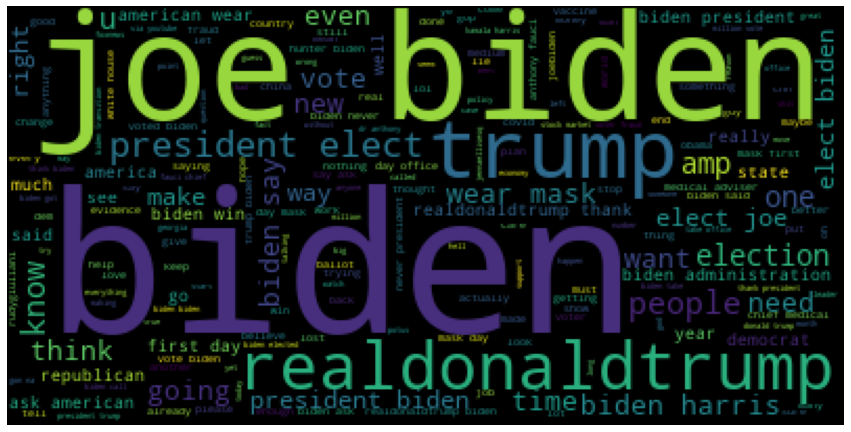

In [44]:
cloud = WordCloud()
cloud = cloud.generate(texts)
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')

### Labeled dataset

#### Word counts

In [45]:
label_raw_word_counts = label_df['raw_text'].apply(lambda x: len(x.split()))

label_raw_word_counts.describe()

count    1766.000000
mean       24.956399
std        14.428796
min         2.000000
25%        13.000000
50%        21.000000
75%        36.000000
max        87.000000
Name: raw_text, dtype: float64

In [46]:
label_clean_word_counts = label_df['clean_text'].apply(lambda x: len(x.split()))

label_clean_word_counts.describe()

count    1766.000000
mean       14.007928
std         7.727362
min         2.000000
25%         8.000000
50%        12.000000
75%        19.000000
max        83.000000
Name: clean_text, dtype: float64

#### Sentiment counts

* subjectivity: 0 - neutral, 1 - opinionated
* polarity: 0 - negative, 1 - positive, 2 - neutral

In [47]:
label_df['subjectivity'].value_counts()

1    1287
0     479
Name: subjectivity, dtype: int64

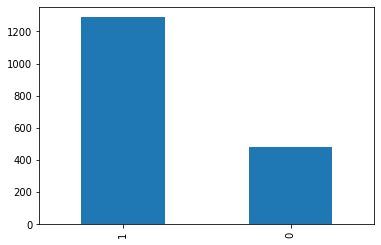

In [48]:
label_df['subjectivity'].value_counts().plot.bar()

In [49]:
label_df['polarity'].value_counts()

0    733
1    554
2    479
Name: polarity, dtype: int64

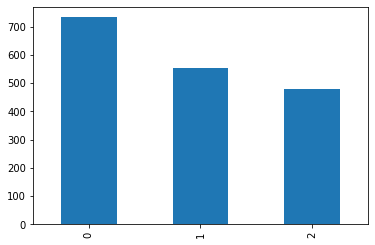

In [50]:
label_df['polarity'].value_counts().plot.bar()

#### Tokenization

In [51]:
label_clean_text_data = label_df['clean_text'].values

label_clean_text_data

array(['rt com guy funding fake story hunter biden',
       'biden apparently told jtaps going ask everyone wear mask day take office thereby ensuring half country exact opposite',
       'kingofgameplay heathmayo given chance blown truth told past year biggest chance result election speak believed mcconnell even slightest intention working biden agree',
       ...,
       'bryceagen itsjefftiedrich realdonaldtrump coachlouholtz iq trying steal election biden every time recount get vote silent majority tired man baby wh freedomwins',
       'tomboliko resistor realdonaldtrump hillary cheat enough last time biden cheated much afford loose stopping count simultaneously several state obvious half country understands election stolen',
       'nix vvsdagger childishhippy bigbullyzell ridalen trump million supporter biden hell even mass murder follower people like stupid shit'],
      dtype=object)

In [52]:
label_texts = ''
for text in label_clean_text_data:
  label_texts += ' ' + text

In [53]:
label_texts

' rt com guy funding fake story hunter biden biden apparently told jtaps going ask everyone wear mask day take office thereby ensuring half country exact opposite kingofgameplay heathmayo given chance blown truth told past year biggest chance result election speak believed mcconnell even slightest intention working biden agree conorjrogers reedgalen could not raise money beat biden election raising line trump pocket enjoy year causing mayhem mar lago biden fire board member postal governor replace breaking biden know fauci doctor biden ask american wear mask first day president realdonaldtrump right president biden talk higher get senschumer trump old news anything biden harris team reverse january realdonaldtrump seanhannity moved biden eviction notice january get cheap made c h n tie aoc would glad help biden admin understand trial healthcare u older aca deductible eobs relationship doctor give encounter sheet clearly show wrong profit system realdonaldtrump thought would crash biden

In [54]:
label_tokens = nltk.tokenize.word_tokenize(label_texts)

label_tokens

['rt',
 'com',
 'guy',
 'funding',
 'fake',
 'story',
 'hunter',
 'biden',
 'biden',
 'apparently',
 'told',
 'jtaps',
 'going',
 'ask',
 'everyone',
 'wear',
 'mask',
 'day',
 'take',
 'office',
 'thereby',
 'ensuring',
 'half',
 'country',
 'exact',
 'opposite',
 'kingofgameplay',
 'heathmayo',
 'given',
 'chance',
 'blown',
 'truth',
 'told',
 'past',
 'year',
 'biggest',
 'chance',
 'result',
 'election',
 'speak',
 'believed',
 'mcconnell',
 'even',
 'slightest',
 'intention',
 'working',
 'biden',
 'agree',
 'conorjrogers',
 'reedgalen',
 'could',
 'not',
 'raise',
 'money',
 'beat',
 'biden',
 'election',
 'raising',
 'line',
 'trump',
 'pocket',
 'enjoy',
 'year',
 'causing',
 'mayhem',
 'mar',
 'lago',
 'biden',
 'fire',
 'board',
 'member',
 'postal',
 'governor',
 'replace',
 'breaking',
 'biden',
 'know',
 'fauci',
 'doctor',
 'biden',
 'ask',
 'american',
 'wear',
 'mask',
 'first',
 'day',
 'president',
 'realdonaldtrump',
 'right',
 'president',
 'biden',
 'talk',
 'high

In [55]:
len(label_tokens)

24738

#### Most frequent words

In [56]:
label_frequency = nltk.FreqDist(label_tokens)
label_most_common = label_frequency.most_common()

label_most_common

[('biden', 1765),
 ('trump', 336),
 ('president', 313),
 ('joe', 310),
 ('realdonaldtrump', 286),
 ('not', 255),
 ('election', 155),
 ('vote', 154),
 ('say', 139),
 ('day', 134),
 ('would', 120),
 ('elect', 119),
 ('like', 118),
 ('get', 113),
 ('mask', 112),
 ('people', 112),
 ('u', 111),
 ('american', 110),
 ('know', 105),
 ('harris', 91),
 ('first', 87),
 ('administration', 84),
 ('win', 84),
 ('think', 82),
 ('going', 78),
 ('want', 78),
 ('one', 78),
 ('wear', 73),
 ('office', 72),
 ('amp', 71),
 ('ask', 67),
 ('fraud', 67),
 ('need', 66),
 ('time', 65),
 ('take', 64),
 ('via', 63),
 ('make', 62),
 ('cnn', 61),
 ('still', 61),
 ('fauci', 59),
 ('right', 57),
 ('joebiden', 56),
 ('said', 56),
 ('ballot', 56),
 ('year', 55),
 ('see', 55),
 ('way', 55),
 ('even', 54),
 ('got', 53),
 ('covid', 53),
 ('news', 51),
 ('republican', 50),
 ('million', 50),
 ('state', 50),
 ('team', 49),
 ('democrat', 49),
 ('voted', 49),
 ('good', 49),
 ('obama', 49),
 ('never', 49),
 ('could', 48),
 ('go'

#### Word cloud

(-0.5, 399.5, 199.5, -0.5)

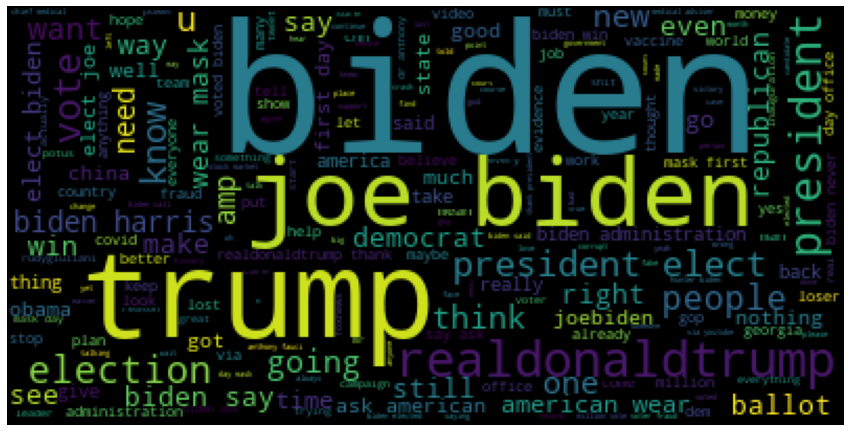

In [57]:
cloud = WordCloud()
cloud = cloud.generate(label_texts)
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')

## Create train-test data

* split labeled data into train (80%) and test sets (20%)

In [58]:
label_df

,raw_text,clean_text,subjectivity,polarity
0,@RT_com That’s the guy who is funding those fa...,rt com guy funding fake story hunter biden,1,1
1,Biden apparently just told JTaps that he's goi...,biden apparently told jtaps going ask everyone...,1,0
2,@Kingofgameplay1 @HeathMayo They've been given...,kingofgameplay heathmayo given chance blown tr...,1,0
3,@conorjrogers @reedgalen They could not raise ...,conorjrogers reedgalen could not raise money b...,1,1
4,Can`t Biden just fire the board members on the...,biden fire board member postal governor replace,1,0
...,...,...,...,...
1761,"@KThomasDC @costareports That’s nice, but I ho...",kthomasdc costareports nice hope biden think m...,0,2
1762,@livingdead1970 OMG. You are a sensitive soul...,livingdead omg sensitive soul record massive o...,1,1
1763,@bryceagen @itsJeffTiedrich @realDonaldTrump @...,bryceagen itsjefftiedrich realdonaldtrump coac...,1,1
1764,@Tomboliko @the_resistor @realDonaldTrump Hill...,tomboliko resistor realdonaldtrump hillary che...,1,0


In [69]:
train_df, test_df = train_test_split(label_df, test_size=0.2, random_state=42)

In [70]:
train_df.shape, test_df.shape

((1412, 4), (354, 4))

In [71]:
train_df

,raw_text,clean_text,subjectivity,polarity
1320,@Sundae_Gurl Biden's first move should be to p...,sundae gurl biden first move pardon hunter let...,0,2
782,@cobiscool @LilNasX Do you think joe Biden dri...,cobiscool lilnasx think joe biden drink caprisun,0,2
1128,"@ProudGayPatriot Don't worry, in the sense tha...",proudgaypatriot worry sense not getting electi...,1,1
199,@kclasgens @realDonaldTrump Not alone he didn'...,kclasgens realdonaldtrump not alone right even...,1,1
704,How Biden’s Climate Plans Will Shake Up Global...,biden climate plan shake global energy market,0,2
...,...,...,...,...
1130,"@CNBC @CNBCPro If Biden comes to power, the go...",cnbc cnbcpro biden come power gold price return,1,1
1294,"@KDFildesMBA We have a real President, Biden a...",kdfildesmba real president biden vice harris e...,1,1
860,"What I care about at least as much, maybe more...",care least much maybe whether biden trump pres...,0,2
1459,Joe Biden still doesn’t realize what the voter...,joe biden still realize voter democrat lost ac...,1,0


In [72]:
test_df

,raw_text,clean_text,subjectivity,polarity
1560,Sidney Powell amends court filing that said Ge...,sidney powell amends court filing said georgia...,1,0
212,@LisaMirandoCNN @wolfblitzer What's your thoug...,lisamirandocnn wolfblitzer thought cnn jake ta...,0,2
1586,Breaking #FoxNews Alert : Joe Biden just revea...,breaking foxnews alert joe biden revealed goin...,0,2
836,"@RWPUSA Richard, have you heard there could be...",rwpusa richard heard could several republican ...,1,0
1245,@LeafCavalier @AFJustinKG1 Is that a real-life...,leafcavalier afjustinkg real life question not...,1,1
...,...,...,...,...
611,@realDonaldTrump Thank you Biden!!!,realdonaldtrump thank biden,1,1
694,Kellyanne Conway acknowledges Biden as apparen...,kellyanne conway acknowledges biden apparent w...,0,2
1704,@JeffTutorials @realDonaldTrump Ah Jeff. I ag...,jefftutorials realdonaldtrump ah jeff agree bi...,1,0
598,CNN Exclusive: Biden says he will ask American...,cnn exclusive biden say ask american wear mask...,0,2


In [73]:
# labeled train data
train_label_file_name = 'biden_tweets_labeled_train.csv'
  
train_df.to_csv(train_label_file_name)

In [74]:
# labeled test data
test_label_file_name = 'biden_tweets_labeled_test.csv'
  
test_df.to_csv(test_label_file_name)